# Benchmark TME cellularity estimations on TCGAov data

Script related to figure 3b

### Aim:
- Benchmark TME cellularity scores using WES derived tumour cellularity as benchmark data set

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Load TCGAov ABSOLUTE tumour cellularity values

In [4]:
TCGA_ABSOLUTE = home + 'Data/3/TCGA_mastercalls.abs_tables_JSedit.fixed.txt'

TCGA_ABSOLUTE = pd.read_csv(TCGA_ABSOLUTE,
                            sep='\t',
                            index_col='array')

In [5]:
TCGA_ABSOLUTE.head()

,sample,call status,purity,ploidy,Genome doublings,Coverage for 80% power,Cancer DNA fraction,Subclonal genome fraction,solution
array,,,,,,,,,
TCGA-OR-A5J1-01,TCGA-OR-A5J1-01A-11D-A29H-01,called,0.90,2.00,0.0,9.0,0.90,0.02,new
TCGA-OR-A5J2-01,TCGA-OR-A5J2-01A-11D-A29H-01,called,0.89,1.30,0.0,6.0,0.84,0.16,new
TCGA-OR-A5J3-01,TCGA-OR-A5J3-01A-11D-A29H-01,called,0.93,1.27,0.0,5.0,0.89,0.11,new
TCGA-OR-A5J4-01,TCGA-OR-A5J4-01A-11D-A29H-01,called,0.87,2.60,1.0,12.0,0.89,0.08,new
TCGA-OR-A5J5-01,TCGA-OR-A5J5-01A-11D-A29H-01,called,0.93,2.79,1.0,12.0,0.95,0.15,new


In [6]:
TCGA_ABSOLUTE['call status'].value_counts()

called             9847
legacy_call         558
maf_call            146
snp_call             56
legacy_maf_call      35
Name: call status, dtype: int64

#### Note: All calls are equaly valid, so we include them all.

### Select purity (tumour cellularity) column

In [7]:
TCGA_ABSOLUTE = TCGA_ABSOLUTE.purity

In [8]:
TCGA_ABSOLUTE.head()

array
TCGA-OR-A5J1-01    0.90
TCGA-OR-A5J2-01    0.89
TCGA-OR-A5J3-01    0.93
TCGA-OR-A5J4-01    0.87
TCGA-OR-A5J5-01    0.93
Name: purity, dtype: float64

In [9]:
TCGA_ABSOLUTE.index = TCGA_ABSOLUTE.index.str.replace('-','.',regex=True)

TCGA_ABSOLUTE.head()

array
TCGA.OR.A5J1.01    0.90
TCGA.OR.A5J2.01    0.89
TCGA.OR.A5J3.01    0.93
TCGA.OR.A5J4.01    0.87
TCGA.OR.A5J5.01    0.93
Name: purity, dtype: float64

## Load methods' TME cellularity estimates

### Bindea

In [10]:
bin_TMEcell = pd.read_csv('../../Data/3/BindeaTMEcellularity_TCGAov_NES.txt',
                          sep='\t',
                          index_col='Term').T

In [11]:
bin_TMEcell.head()

Term,Bindea_TMEcell
TCGA.04.1348.01,0.723236
TCGA.04.1357.01,1.022811
TCGA.04.1362.01,0.534747
TCGA.04.1364.01,0.311013
TCGA.04.1365.01,0.718616


### Davoli

In [12]:
dav_TMEcell = pd.read_csv('../../Data/3/DavoliTMEcellularity_TCGAov_NES.txt',
                          sep='\t',
                          index_col='Term').T

In [13]:
dav_TMEcell.head()

Term,Davoli_TMEcell
TCGA.04.1348.01,0.153285
TCGA.04.1357.01,0.375687
TCGA.04.1362.01,-0.254021
TCGA.04.1364.01,-0.531053
TCGA.04.1365.01,0.078472


### Danaher

In [14]:
dan_TMEcell = pd.read_csv('../../Data/3/DanaherTMEcellularity_TCGAov_NES.txt',
                          sep='\t',
                          index_col='Term').T

In [15]:
dan_TMEcell.head()

Term,Danaher_TMEcell
TCGA.04.1348.01,-0.281531
TCGA.04.1357.01,-0.062624
TCGA.04.1362.01,-0.684181
TCGA.04.1364.01,-0.877149
TCGA.04.1365.01,-0.338026


### MCP counter

In [16]:
mcp_TMEcell = pd.read_csv('../../Data/3/MCPcounterTMEcellularity_TCGAov_Results.txt',
                          sep='\t',
                          index_col='Term').T

In [17]:
mcp_TMEcell.head()

Term,MCP_TMEcellularity
TCGA.04.1348.01,6952.395676
TCGA.04.1357.01,12192.969025
TCGA.04.1362.01,4465.014345
TCGA.04.1364.01,3388.718674
TCGA.04.1365.01,4937.825784


In [18]:
mcp_TMEcell.rename(columns={'MCP_TMEcellularity':'MCP_TMEcell'},
                   inplace=True)

In [19]:
mcp_TMEcell.head()

Term,MCP_TMEcell
TCGA.04.1348.01,6952.395676
TCGA.04.1357.01,12192.969025
TCGA.04.1362.01,4465.014345
TCGA.04.1364.01,3388.718674
TCGA.04.1365.01,4937.825784


### CIBERSORT absolute

In [20]:
cib_abs_results = pd.read_csv('../../Data/3/CIBERSORT_absolute_TCGAov_Results.txt',
                              sep='\t',
                              index_col='Mixture')

In [21]:
cib_abs_results.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE,Absolute score (sig.score)
Mixture,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1348-01,0.000795,0.000830,0.000000,0.025868,0.0,0.038003,0.0,0.043519,0.026832,0.0,...,0.000000,0.000000,0.000000,0.014234,0.0,0.000000,0.009,0.272048,0.984897,0.364292
TCGA-04-1357-01,0.015474,0.000000,0.000000,0.083101,0.0,0.120940,0.0,0.053592,0.052900,0.0,...,0.001035,0.000000,0.014600,0.000000,0.0,0.000000,0.006,0.304838,0.963618,0.605621
TCGA-04-1362-01,0.008684,0.000000,0.000058,0.000000,0.0,0.049975,0.0,0.010518,0.000000,0.0,...,0.000000,0.017518,0.000000,0.001998,0.0,0.000000,0.402,0.036200,1.074131,0.180222
TCGA-04-1364-01,0.018040,0.000000,0.001023,0.000000,0.0,0.004297,0.0,0.001651,0.002840,0.0,...,0.000000,0.000000,0.000046,0.000000,0.0,0.000000,0.557,0.014525,1.118393,0.050569
TCGA-04-1365-01,0.001747,0.000229,0.000000,0.000000,0.0,0.072325,0.0,0.048944,0.020026,0.0,...,0.000000,0.000000,0.002676,0.000000,0.0,0.000605,0.010,0.263271,0.992150,0.335663


### Calculate samples TME cellularity based on CIBERSORT absolute score

In [22]:
# Remove columns that are not cells
cib_not_cells = ['P-value',
                 'Correlation',
                 'RMSE',
                 'Absolute score (sig.score)']

cib_abs_TMEcell = cib_abs_results.drop(labels=cib_not_cells,
                                       axis='columns').sum(axis='columns')

In [23]:
cib_abs_TMEcell.head()

Mixture
TCGA-04-1348-01    0.364292
TCGA-04-1357-01    0.605621
TCGA-04-1362-01    0.180222
TCGA-04-1364-01    0.050569
TCGA-04-1365-01    0.335663
dtype: float64

In [24]:
cib_abs_TMEcell_df = pd.DataFrame({'Term':cib_abs_results.index,
                                   'CIBERSORT_abs_TMEcell':cib_abs_TMEcell})

cib_abs_TMEcell_df.set_index('Term',
                             inplace=True)

In [25]:
cib_abs_TMEcell_df.head()

,CIBERSORT_abs_TMEcell
Term,
TCGA-04-1348-01,0.364292
TCGA-04-1357-01,0.605621
TCGA-04-1362-01,0.180222
TCGA-04-1364-01,0.050569
TCGA-04-1365-01,0.335663


In [26]:
cib_abs_TMEcell_df.index = cib_abs_TMEcell_df.index.str.replace('-','.',regex=True)

cib_abs_TMEcell_df.head()

,CIBERSORT_abs_TMEcell
Term,
TCGA.04.1348.01,0.364292
TCGA.04.1357.01,0.605621
TCGA.04.1362.01,0.180222
TCGA.04.1364.01,0.050569
TCGA.04.1365.01,0.335663


### xCELL TME cellularity

In [29]:
xcell_TMEcell = pd.read_csv('../../Data/3/xCell_TCGAov_RNAseq_Results.txt',
                            sep='\t',
                            index_col=0).T

In [30]:
xcell_TMEcell.head()

Term,Adipocytes,Astrocytes,B-cells,Basophils,CD4+ T-cells,CD4+ Tcm,CD4+ Tem,CD4+ memory T-cells,CD4+ naive T-cells,CD8+ T-cells,...,cDC,iDC,ly Endothelial cells,mv Endothelial cells,naive B-cells,pDC,pro B-cells,ImmuneScore,StromaScore,MicroenvironmentScore
TCGA.04.1348.01,0.0000,0.0494,0.0535,0.1007,0.0,0.0000,0.0000,0.0074,0.0000,0.0264,...,0.0287,0.0,0.0000,0.0098,0.0,0.0199,0.0442,0.1219,0.0030,0.1249
TCGA.04.1357.01,0.0000,0.0301,0.1330,0.0486,0.0,0.0034,0.0458,0.0087,0.0227,0.1359,...,0.1140,0.0,0.0000,0.0037,0.0,0.0382,0.0015,0.2847,0.0238,0.3085
TCGA.04.1362.01,0.0000,0.0506,0.0039,0.0393,0.0,0.0239,0.0000,0.0000,0.0000,0.0000,...,0.0125,0.0,0.0019,0.0032,0.0,0.0070,0.0116,0.0303,0.0022,0.0325
TCGA.04.1364.01,0.0016,0.0654,0.0000,0.0452,0.0,0.0038,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0021,0.0117,0.0,0.0000,0.0390,0.0057,0.0018,0.0075
TCGA.04.1365.01,0.0000,0.0612,0.0179,0.0906,0.0,0.0000,0.0000,0.0121,0.0000,0.0000,...,0.0289,0.0,0.0000,0.0039,0.0,0.0155,0.0276,0.0631,0.0006,0.0637


In [31]:
xcell_TMEcell = xcell_TMEcell.MicroenvironmentScore

In [32]:
xcell_TMEcell.head()

TCGA.04.1348.01    0.1249
TCGA.04.1357.01    0.3085
TCGA.04.1362.01    0.0325
TCGA.04.1364.01    0.0075
TCGA.04.1365.01    0.0637
Name: MicroenvironmentScore, dtype: float64

In [33]:
xcell_TMEcell_df = pd.DataFrame({
    'Index':xcell_TMEcell.index,
    'xcell_TMEcell':xcell_TMEcell
})

xcell_TMEcell_df.set_index('Index',
                           inplace=True)

In [34]:
xcell_TMEcell_df.head()

,xcell_TMEcell
Index,
TCGA.04.1348.01,0.1249
TCGA.04.1357.01,0.3085
TCGA.04.1362.01,0.0325
TCGA.04.1364.01,0.0075
TCGA.04.1365.01,0.0637


### Consensus TME cellularity

In [35]:
con_TMEcell = pd.read_csv('../../Data/3/ConsensusTMEcellularity_TCGAov_NES.txt',
                          sep='\t',
                          index_col='Term').T

In [36]:
con_TMEcell.head()

Term,ConsensusTME_TMEcellularity
TCGA.04.1348.01,0.301297
TCGA.04.1357.01,0.512581
TCGA.04.1362.01,-0.010106
TCGA.04.1364.01,-0.323944
TCGA.04.1365.01,0.231749


In [37]:
con_TMEcell.rename(columns={'ConsensusTME_TMEcellularity':'ConsensusTMEcell'},
                   inplace=True)

In [38]:
con_TMEcell.head()

Term,ConsensusTMEcell
TCGA.04.1348.01,0.301297
TCGA.04.1357.01,0.512581
TCGA.04.1362.01,-0.010106
TCGA.04.1364.01,-0.323944
TCGA.04.1365.01,0.231749


## Intersect TCGAov samples with ABOLUTE Tumour cellularity and RNA TME cellularity

In [39]:
len(con_TMEcell)

307

In [40]:
len(TCGA_ABSOLUTE)

10786

In [41]:
overlap_samples = set(TCGA_ABSOLUTE.index) & set(con_TMEcell.index)

len(overlap_samples)

297

### Set samples to the ones that overlap

In [42]:
TCGAov_ABSOLUTE = pd.DataFrame(TCGA_ABSOLUTE[TCGA_ABSOLUTE.index.isin(overlap_samples)]).sort_index()
bin_TMEcell = bin_TMEcell[bin_TMEcell.index.isin(overlap_samples)].sort_index()
dav_TMEcell = dav_TMEcell[dav_TMEcell.index.isin(overlap_samples)].sort_index()
dan_TMEcell = dan_TMEcell[dan_TMEcell.index.isin(overlap_samples)].sort_index()
mcp_TMEcell = mcp_TMEcell[mcp_TMEcell.index.isin(overlap_samples)].sort_index()
cib_TMEcell = cib_abs_TMEcell_df[cib_abs_TMEcell_df.index.isin(overlap_samples)].sort_index()
xce_TMEcell = xcell_TMEcell_df[xcell_TMEcell_df.index.isin(overlap_samples)].sort_index()
con_TMEcell = con_TMEcell[con_TMEcell.index.isin(overlap_samples)].sort_index()

In [43]:
con_TMEcell.head()

Term,ConsensusTMEcell
TCGA.04.1348.01,0.301297
TCGA.04.1357.01,0.512581
TCGA.04.1362.01,-0.010106
TCGA.04.1364.01,-0.323944
TCGA.04.1365.01,0.231749


In [44]:
len(TCGAov_ABSOLUTE)

297

## Compare correlations

In [45]:
cellularities_df = pd.concat([TCGAov_ABSOLUTE,
                              bin_TMEcell,
                              dav_TMEcell,
                              dan_TMEcell,
                              mcp_TMEcell,
                              xce_TMEcell,
                              cib_TMEcell,
                              con_TMEcell],
                              axis='columns',
                              join='inner')

In [46]:
cellularities_df.tail()

,purity,Bindea_TMEcell,Davoli_TMEcell,Danaher_TMEcell,MCP_TMEcell,xcell_TMEcell,CIBERSORT_abs_TMEcell,ConsensusTMEcell
TCGA.61.2113.01,0.49,0.823932,0.054177,-0.396719,50960.515249,0.1242,0.370066,0.248276
TCGA.OY.A56P.01,0.96,0.379263,-0.487841,-0.862766,7606.585967,0.0525,0.050431,-0.241627
TCGA.OY.A56Q.01,0.98,0.353461,-0.509548,-0.846367,1629.012154,0.0620,0.046361,-0.277074
TCGA.VG.A8LO.01,0.93,0.433556,-0.283772,-0.767907,8728.703190,0.0736,0.093726,-0.138293
TCGA.WR.A838.01,0.95,0.329305,-0.487562,-0.958864,6448.605191,0.0347,0.063276,-0.268326


In [47]:
len(cellularities_df)

297

### Check and drop nans

In [48]:
if True in cellularities_df.isnull().values:
    
    cellularities_df.dropna(axis='index',
                            how='any',
                            inplace=True)

In [49]:
True in cellularities_df.isnull().values

False

In [50]:
import scipy.stats

In [51]:
x = cellularities_df["purity"]

correlations = []
for cellularity_estimate in cellularities_df:
    
    if cellularity_estimate != "purity":
    
        y = cellularities_df[cellularity_estimate]
    
        print(cellularity_estimate+"\n")

        n1 = scipy.stats.shapiro(x)[1]
        n2 = scipy.stats.shapiro(y)[1]

        n3 = scipy.stats.normaltest(x)[1]
        n4 = scipy.stats.normaltest(y)[1]

        n5 = scipy.stats.anderson(x)
        n6 = scipy.stats.anderson(y)

        if min([n1,n2,n3,n4]) < 0.05: # not normal
            
            print("NOT normal")

            h1 = scipy.stats.levene(x, y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
                #print(h1)
            else:
                print("HOMOscedastic\n")

        else:
            
            print("Normal")

            h1 = scipy.stats.bartlett(x,y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
            else:
                print("HOMOscedastic\n")

        if min([n1,n2,n3,n4,h1]) < 0.05:

            print("KENDALL")

            print(scipy.stats.kendalltau(x,y)[1])
            
            cor, p_val = scipy.stats.kendalltau(x,y)

        else:

            print("anderson")

            print(n5[0], n5[1])
            print(n6[0], n6[1])
            print("\n")

            print("PEARSON")
            print(scipy.stats.pearsonr(x,y)[1])
            
            cor, p_val = scipy.stats.pearsonr(x,y)
                
            print("\n")
            
        correlations.append([cellularity_estimate,cor,p_val])

Bindea_TMEcell

NOT normal
HETEROscedastic

KENDALL
5.988771024039335e-43
Davoli_TMEcell

NOT normal
HETEROscedastic

KENDALL
2.780194559132955e-34
Danaher_TMEcell

NOT normal
HETEROscedastic

KENDALL
1.989000708458872e-33
MCP_TMEcell

NOT normal
HETEROscedastic

KENDALL
5.9828139478996295e-27
xcell_TMEcell

NOT normal
HETEROscedastic

KENDALL
5.827348506182833e-32
CIBERSORT_abs_TMEcell

NOT normal
HOMOscedastic

KENDALL
1.9370447466438095e-39
ConsensusTMEcell

NOT normal
HETEROscedastic

KENDALL
3.7616137360608453e-42


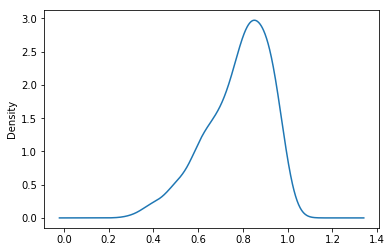

In [52]:
cellularities_df["purity"].plot(kind="kde")

In [53]:
scipy.stats.shapiro(cellularities_df["purity"].values)

(0.9457369446754456, 6.359704762814999e-09)

In [54]:
correlations.sort(key=lambda x: x[1])

In [55]:
correlations

[['Bindea_TMEcell', -0.5436716044609848, 5.988771024039335e-43],
 ['ConsensusTMEcell', -0.538380626514282, 3.7616137360608453e-42],
 ['CIBERSORT_abs_TMEcell', -0.5200039263243942, 1.9370447466438095e-39],
 ['Davoli_TMEcell', -0.48315604419557046, 2.780194559132955e-34],
 ['Danaher_TMEcell', -0.4767785261348125, 1.989000708458872e-33],
 ['xcell_TMEcell', -0.4657058920059598, 5.827348506182833e-32],
 ['MCP_TMEcell', -0.4253804546525557, 5.9828139478996295e-27]]

In [56]:
pvals = [corr[2] for corr in correlations]

pvals

[5.988771024039335e-43,
 3.7616137360608453e-42,
 1.9370447466438095e-39,
 2.780194559132955e-34,
 1.989000708458872e-33,
 5.827348506182833e-32,
 5.9828139478996295e-27]

In [57]:
for i, pval in enumerate(pvals):
    if pval <= 0.0001:
        print(correlations[i][0], "****")
    elif pval <= 0.001:
        print(correlations[i][0], "***")
    elif pval <= 0.01:
        print(correlations[i][0], "**")
    elif pval <= 0.05:
        print(correlations[i][0], "*")
    elif pval <= 0.1:
        print(correlations[i][0], ".")
    else:
        print(correlations[i][0], "Not significant")

Bindea_TMEcell ****
ConsensusTMEcell ****
CIBERSORT_abs_TMEcell ****
Davoli_TMEcell ****
Danaher_TMEcell ****
xcell_TMEcell ****
MCP_TMEcell ****


## Plot barplot correlations

### Define method colour

In [58]:
method_colours = dict({
    'CIBERSORT_abs_TMEcell': '#6FCCDD',
    'MCP_TMEcell':           '#B9529F',
    'Danaher_TMEcell':       '#0E8040',
    'xcell_TMEcell':         '#F7931D',
    'Bindea_TMEcell':        '#F6EB16',
    'Davoli_TMEcell':        '#231F20',
    'ConsensusTMEcell':      '#3953A4',
    'TIMER':                 '#FF0000'
})

In [59]:
correlations_dict = {m[0]: {'tau': m[1]} for m in correlations}

In [60]:
correlations_df = pd.DataFrame.from_dict(correlations_dict)

correlations_df.sort_values(by=['tau'],
                            axis='columns',
                            inplace=True)

In [61]:
correlations_df

,Bindea_TMEcell,ConsensusTMEcell,CIBERSORT_abs_TMEcell,Davoli_TMEcell,Danaher_TMEcell,xcell_TMEcell,MCP_TMEcell
tau,-0.543672,-0.538381,-0.520004,-0.483156,-0.476779,-0.465706,-0.42538


In [63]:
bar_colors = [method_colours[col] for col in correlations_df.columns.values]

bar_colors

['#F6EB16', '#3953A4', '#6FCCDD', '#231F20', '#0E8040', '#F7931D', '#B9529F']

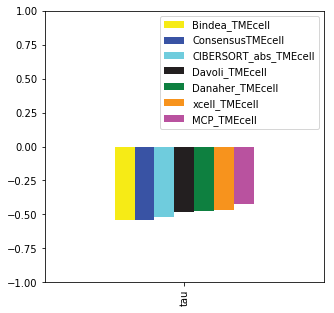

In [64]:
ax = correlations_df.plot(kind='bar',
                          color=bar_colors,
                          figsize=(5,5),
                          ylim=(-1,1))

In [65]:
fig = ax.get_figure()

In [66]:
FILE = "../../Figures/main/3/panels/3b_TCGAov_WES_TME_vs_RNA_TME_tau.pdf"

In [67]:
fig.savefig(FILE, bbox_tight=True)

# End script